In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn

from numpy.random import choice
from scipy.stats import *

%matplotlib inline

# Задание 1

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа (решение на бумажке и на python).

In [2]:
p=0.5
n=15
rv = binom(n, p)
#считаем мат ожидание и дисперсию - надо ли здесь?
mean, var, _, _ = binom.stats(n, p, moments='mvsk')
print(mean, var)

7.5 3.75


#график плотности распределения в каждой точке
#просемплировали 1010 раз и увидели по каждому возможному варианту распределение вероятностей

#плотность распределения по y 0.35  p=1/2

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

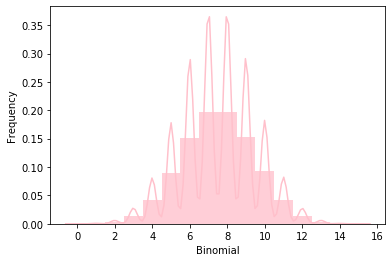

In [3]:
data=binom.rvs(n,p,loc=0,size=100000)
ax=seaborn.distplot(data,
                kde=True,
                color='pink',
                hist_kws={"linewidth": 22,'alpha':0.77},
                bins=np.arange(-0.5, 15.5, 1))
ax.set(xlabel='Binomial',ylabel='Frequency')

In [4]:
primes = [2, 3, 5, 7, 11, 13] 
np.mean([x in primes for x in data])
        

0.35035

In [5]:
#просуммировать в каждом xx, где xx - простое число
(sum([binom.pmf(x, n, p) for x in primes])).round(2)
#не получается просуммировать - почему?????? сумма около 0.35

0.35

### Задание 2

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [6]:
#Генерация с заданныи вероятностями
probas = np.random.random(10)
probas = probas / probas.sum()
values = list(range(10))

values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
sample = np.random.choice(values, size=1000, p=probas)
means = sample.mean(axis=0) 
var=sample.var(axis=0)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

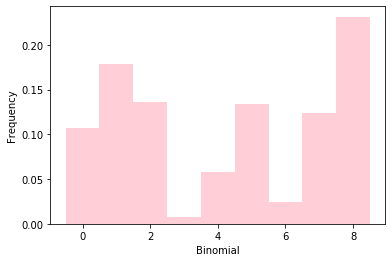

In [17]:
#не получается построить гистограмму
ax=seaborn.distplot(sample,
                norm_hist=True,
                kde=False,
                color='pink',
                hist_kws={"linewidth": 22,'alpha':0.77},
                bins=np.arange(-0.5, 9.5, 1))
ax.set(xlabel='Binomial',ylabel='Frequency')

In [18]:
print(f"среднее, {np.mean(sample)}, дисперсия {(np.var(sample)).round(2)}, медиана {np.median(sample)}.")

среднее, 4.412, дисперсия 9.34, медиана 5.0.


### Задание 3

Задача с 17-го слайда лекции про 3 монеты. Покажите, почему 3 события являются попарно независимыми, но <b>не</b> являются независимыми в совокупности.


Пусть брошены 3 уравновешенные монеты. Рассмотрим 3 события:
$A_1$ - монеты 1 и 2 упали одной и той же стороной,
$A_2$ - монеты 2 и 3 упали одной и той же стороной,
$A_3$ - монеты 1 и 3 упали одной и той же стороной.

In [19]:
#?????

### Задание 4 (формула полной вероятности)

В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [20]:
Pb = [0.2, 0.3, 0.5]
PA = [0.1, 0.05, 0.2]
(np.array(Pb)*np.array(PA)).sum()

0.135